 ## DHARMA S
#### INTERN AT THE SPARKS FOUNDATION(GRIP)
#### DOMAIN : DATA SCIENCE & BUSINESS ANALYTICS
#### TASK - 1 : PREDICTION USING SUPERVISED ML 
#### BATCH : JUNE 2023

## Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Implementing the Linear Regression

In [3]:
class LinearRegression:
    def fit(self,X,y):
        m = X.shape[0]
        X_mean, y_mean = np.mean(X), np.mean(y)
        X_mean_diff, y_mean_diff = X-X_mean, y-y_mean
        self.b1 = (X_mean_diff @ y_mean_diff) / (X_mean_diff @ X_mean_diff)
        self.b0 = y_mean - (self.b1 * X_mean)
        return self
    
    def predict(self,X):
        return self.b0 + X*self.b1

    def evaluate(self,X,y):
        y_pred = self.predict(X)
        y_diff,y_mean_diff  = y-y_pred , y-np.mean(y)
        rmse = np.sqrt(y_diff @ y_diff/X.shape[0])
        ss_tot = y_mean_diff @ y_mean_diff
        ss_res = y_diff @ y_diff
        r2 = 1 - ss_res/ss_tot
        print("Root mean squared Error:",rmse)
        print("R^2 value:",r2)

# Ploting the function for regression

In [11]:
def regression_plot(X,y,model,title=""):
    plt.figure(figsize=(6,7))
    plt.title(title)
    plt.xlabel("Hours")
    plt.ylabel("scores")
    
    x_line = np.array([np.min(X),np.max(X)]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(X, y,c='blue', label='Original Data Points')
    plt.plot(x_line, y_line,linewidth=4, label='Regression Line')
    plt.legend()
     

# Loading and processing the dataset

In [5]:
data = pd.read_csv("datasets/students_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# ploting distribution for scores

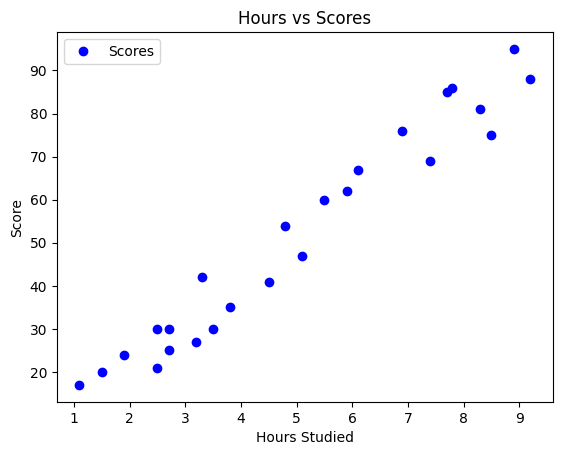

In [6]:
data.plot(x='Hours',y='Scores',style= 'o',c = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

# Implementing the Linear Regression using scrath

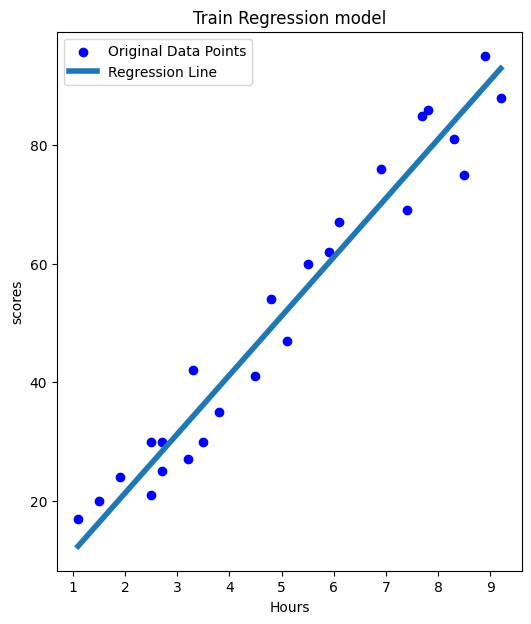

In [12]:
X = data['Hours'].values
y = data['Scores'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)
regression_plot(X,y,model,title = 'Train Regression model')


# Testing the model

In [14]:
y_pred = model.predict(X_test)
testing = pd.DataFrame({"Actual":y_test ,"Predicted":y_pred})
testing

,Actual,Predicted
0,30,26.287177
1,81,83.992500
2,24,20.317661
3,54,49.170323
4,35,39.221129


# Testing the model with study hour '9.25' per day

In [16]:
hours = 9.25
test = model.predict(hours)
print(f"Spending 9.25 hours per day will make a student able to score {test:2f} % marks.")


Spending 9.25 hours per day will make a student able to score 93.444234 % marks.


## Evaluating the model using "Root Mean Square Error"

In [18]:
Evaluate = model.evaluate(X,y)

Root mean squared Error: 5.395084280249839
R^2 value: 0.9525829545364224
